Игорь Шадрин ДЗ-4

In [1]:
import datetime as dt # для работы со временем 

import numpy as np # уже знакомые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from pandas.tseries.holiday import USFederalHolidayCalendar 
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday


In [2]:
#готовим список выходных и праздничных дней
data = pd.read_csv('https://data.gov.ru/opendata/7708660670-proizvcalendar/data-20191112T1252-structure-20191112T1247.csv')

Rus_hol=[]
Pre_hol=[]
for rows in data.itertuples():
    Year=rows[1]
    for j in range(2,14):
        Month=j-1
        datasp=rows[j].split(',')
        for datas in datasp:
            if datas[-1]!='*':
                if datas[-1]=='+':
                    datas=datas[:-1]
                Rus_hol.append([Year,Month,int(datas)])
            else:
                datas=datas[:-1]
                Pre_hol.append([Year,Month,int(datas)])

columns=['year','month','day']

RusHol=pd.DataFrame(Rus_hol,columns=columns)
RusHol.index = pd.to_datetime(RusHol[['year','month','day']], yearfirst=True).dt.strftime('%Y-%m-%d')


#print(RusHol.index)

In [3]:
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date =dt.datetime(1999,1,1)
    end_date=dt.datetime(2026,1,1)
    rules = [
        Holiday(name="Russian day-off", year=d.year, month=d.month, day=d.day)
        for d in pd.to_datetime(RusHol.index)
    ]
Calen0= RussianBusinessCalendar()  
rus_busday=CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', calendar=RussianBusinessCalendar())
DayOff=Calen0.holidays(start=dt.datetime(1999,1,1),end=dt.datetime(2026,1,1))
#print (DayOff)

In [4]:
class RussianCelebCalendar(AbstractHolidayCalendar):
    start_date =dt.datetime(1999,1,1)
    end_date=dt.datetime(2026,1,1)
    rules = [
        Holiday(name="Новый год", month=1, day=1),
        Holiday(name="Рождество", month=1, day=7),
        Holiday(name="23 февраля", month=2, day=23),
        Holiday(name="8 марта", month=3, day=8),
        Holiday(name="1 мая", month=5, day=1),
        Holiday(name="9 мая", month=5, day=9),
        Holiday(name="12 июня", month=6, day=12),
        Holiday(name="4 ноября", month=11, day=4)
    ]
Calen1= RussianCelebCalendar()
Celeb=Calen1.holidays(start=dt.datetime(1999,1,1),end=dt.datetime(2026,1,1))
#print(Celeb)

In [5]:
import locale


locale.setlocale(locale.LC_ALL, ('Russian_Russia', '1251'))

'Russian_Russia.1251'

In [6]:
Period=pd.date_range(start='1999-01-01', end='2026-1-1', freq='d')
lst=[{'W_D': x.strftime("%a"), 'M':x.strftime("%B")} for x in Period]
events=pd.DataFrame(lst, index=Period)
l_d=['Пн' ,'Вт', 'Ср','Чт', 'Пт', 'Сб', 'Вс','Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
events=pd.get_dummies(events,columns=['W_D','M'],prefix=['',''], prefix_sep='')
events=events[l_d]

In [7]:
events['Предпраздничный рабочий день']=0
mask1=[pd.to_datetime(dt.datetime(x[0],x[1],x[2])).strftime('%Y-%m-%d') for x in Pre_hol]
events.loc[mask1,'Предпраздничный рабочий день']=1



In [8]:
LastDoM=pd.date_range(start='1999-01-01', end='2026-1-1', freq='M')
events['Последний день месяца']=0
events.loc[LastDoM,'Последний день месяца']=1
#print(events.loc[LastDoM,'Последний день месяца'])

In [9]:
events['Праздничный день']=0
events.loc[Celeb,'Праздничный день']=1
events['Выходной день']=0
events.loc[DayOff,'Выходной день']=1


In [10]:
LastWDoM=pd.date_range(start='1999-01-01', end='2026-1-1', freq='BM')
events['Последний рабочий день месяца']=0
events.loc[LastWDoM,'Последний рабочий день месяца']=1
#print(events.loc[LastWDoM,'Последний рабочий день месяца'])

In [11]:
NewYearDays=pd.date_range(start='1999-01-02', end='2026-1-1', freq='AS')
#print(NewYearDays)

In [12]:
def LastWE(Data):
    if Data.day==6:
        previous_day=Data-pd.offsets.Day()
    else:
        previous_day=Data-pd.offsets.Week(weekday=6)
    return previous_day

In [13]:
LastWENY=list(map(LastWE,NewYearDays))

In [14]:
events['Предновогодний выходной день']=0
events.loc[LastWENY,'Предновогодний выходной день']=1

### Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

In [15]:
# пример требуемого DataFrame 
events.head(10)

,Пн,Вт,Ср,Чт,Пт,Сб,Вс,Январь,Февраль,Март,...,Сентябрь,Октябрь,Ноябрь,Декабрь,Предпраздничный рабочий день,Последний день месяца,Праздничный день,Выходной день,Последний рабочий день месяца,Предновогодний выходной день
1999-01-01,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1999-01-02,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1999-01-03,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1999-01-04,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1999-01-05,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-06,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1999-01-07,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1999-01-08,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-09,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1999-01-10,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
events.loc['2013-05-01']

Пн                               0
Вт                               0
Ср                               1
Чт                               0
Пт                               0
Сб                               0
Вс                               0
Январь                           0
Февраль                          0
Март                             0
Апрель                           0
Май                              1
Июнь                             0
Июль                             0
Август                           0
Сентябрь                         0
Октябрь                          0
Ноябрь                           0
Декабрь                          0
Предпраздничный рабочий день     0
Последний день месяца            0
Праздничный день                 1
Выходной день                    1
Последний рабочий день месяца    0
Предновогодний выходной день     0
Name: 2013-05-01 00:00:00, dtype: int64

### Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

<AxesSubplot:xlabel='TRADEDATE'>

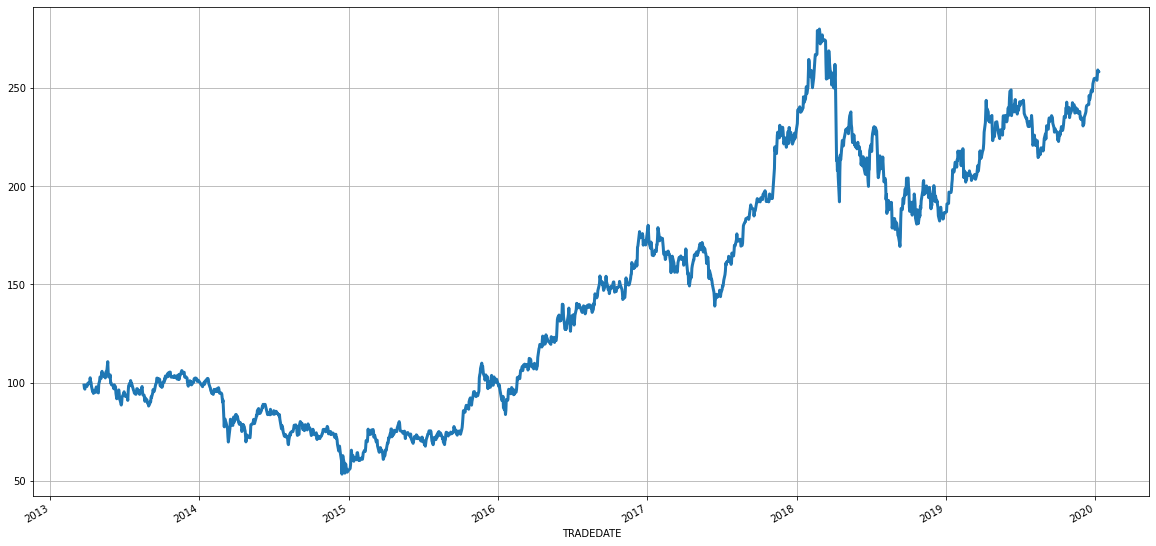

In [17]:
ts = pd.read_csv('../data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE

ts.plot(figsize=(20, 10), grid=True, linewidth=3)

In [18]:
ts=ts.asfreq(freq='1D').fillna(method='ffill')


In [19]:
ts1=ts.shift(1, freq=pd.offsets.BDay())
ts1=ts1[~ts1.index.duplicated(keep='first')]
ts3=ts.shift(3, freq=pd.offsets.BDay())
ts3=ts3[~ts3.index.duplicated(keep='first')]
ts5=ts.shift(5, freq=pd.offsets.BDay())
ts5=ts5[~ts5.index.duplicated(keep='first')]

In [20]:
df=ts.to_frame()


In [21]:
df['weekday'] = df.index.weekday


In [22]:
df1=ts1.to_frame('CLOSE_lag1')
df3=ts3.to_frame('CLOSE_lag3')
df5=ts5.to_frame('CLOSE_lag5')

df=df.merge(df1,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(df3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(df5,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')


In [23]:
ds1=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=1).mean().shift(1)).to_frame('Sk1_mean')
ds3=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=3).mean().shift(1)).to_frame('Sk3_mean')
ds5=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).to_frame('Sk5_mean')
df=df.merge(ds1,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds5,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')



In [24]:
ds1=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=1).median().shift(1)).to_frame('Sk1_median')
ds3=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=3).median().shift(1)).to_frame('Sk3_median')
ds5=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).median().shift(1)).to_frame('Sk5_median')
df=df.merge(ds1,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds5,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')

In [25]:
ds1=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=1).min().shift(1)).to_frame('Sk1_min')
ds3=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=3).min().shift(1)).to_frame('Sk3_min')
ds5=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).min().shift(1)).to_frame('Sk5_min')
df=df.merge(ds1,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds5,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')

In [26]:
ds1=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=1).max().shift(1)).to_frame('Sk1_max')
ds3=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=3).max().shift(1)).to_frame('Sk3_max')
ds5=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).max().shift(1)).to_frame('Sk5_max')
df=df.merge(ds1,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds5,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')

In [27]:
ds1=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=1).std().shift(1)).to_frame('Sk1_std')
ds3=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=3).std().shift(1)).to_frame('Sk3_std')
ds5=df.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).std().shift(1)).to_frame('Sk5_std')
df=df.merge(ds1,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ds5,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')

In [28]:
dc=ts.to_frame()

ev=events.merge(dc,how='inner',left_index=True, right_index=True, copy=True, validate='one_to_one')
ev.drop(ev.columns[range(19)], axis = 1, inplace = True)
ev.drop(ev.columns[[1,4,5]], axis = 1, inplace = True)

In [29]:
ev2= ev.groupby('Праздничный день').get_group(1)['CLOSE'].transform(lambda x: x.expanding().agg(['mean', 'median', 'max', 'min', 'std']))
s1=['mean', 'median', 'max', 'min', 'std']
s2=['Cel_'+x for x in s1]
ev2.columns=s2
ev3= ev.groupby('Выходной день').get_group(0)['CLOSE'].transform(lambda x: x.expanding().agg(['mean', 'median', 'max', 'min', 'std']))
s3=['WorkD_'+x for x in s1]
ev3.columns=s3
ev4= ev.groupby('Предпраздничный рабочий день').get_group(1)['CLOSE'].transform(lambda x: x.expanding().agg(['mean', 'median', 'max', 'min', 'std']))
s4=['PreC_'+x for x in s1]
ev4.columns=s4


In [30]:
df=df.merge(ev2,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ev3,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')
df=df.merge(ev4,how='left',left_index=True, right_index=True, copy=True, validate='one_to_one')

In [31]:
df.iloc[21:40]

,CLOSE,weekday,CLOSE_lag1,CLOSE_lag3,CLOSE_lag5,Sk1_mean,Sk3_mean,Sk5_mean,Sk1_median,Sk3_median,...,WorkD_mean,WorkD_median,WorkD_max,WorkD_min,WorkD_std,PreC_mean,PreC_median,PreC_max,PreC_min,PreC_std
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-04-15,95.48,0,98.34,100.56,100.43,100.43,99.096667,NaN,100.43,98.79,...,98.976250,98.860,102.53,95.48,1.677998,NaN,NaN,NaN,NaN,NaN
2013-04-16,95.92,1,95.48,100.31,102.53,102.53,99.553333,NaN,102.53,98.93,...,98.796471,98.790,102.53,95.48,1.785819,NaN,NaN,NaN,NaN,NaN
2013-04-17,94.58,2,95.92,98.34,100.56,100.56,98.966667,NaN,100.56,99.59,...,98.562222,98.775,102.53,94.58,1.997312,NaN,NaN,NaN,NaN,NaN
2013-04-18,95.35,3,94.58,95.48,100.31,100.31,99.603333,NaN,100.31,99.91,...,98.393158,98.760,102.53,94.58,2.076223,NaN,NaN,NaN,NaN,NaN
2013-04-19,96.22,4,95.35,95.92,98.34,98.34,98.826667,NaN,98.34,98.76,...,98.284500,98.675,102.53,94.58,2.078450,NaN,NaN,NaN,NaN,NaN
2013-04-20,96.22,5,NaN,NaN,NaN,98.34,98.826667,NaN,98.34,98.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-21,96.22,6,NaN,NaN,NaN,98.34,98.826667,NaN,98.34,98.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-22,95.10,0,96.22,94.58,95.48,95.48,97.993333,NaN,95.48,98.07,...,98.132857,98.590,102.53,94.58,2.141696,NaN,NaN,NaN,NaN,NaN
2013-04-23,96.46,1,95.10,95.35,95.92,95.92,99.126667,NaN,95.92,98.93,...,98.056818,98.465,102.53,94.58,2.120293,NaN,NaN,NaN,NaN,NaN
